In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np

df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]


X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#kNN
ks = range(1, 21)
train_precision = []
test_precision = []

train_recall = []
test_recall = []
#params ={V:2}
for i, k in enumerate(ks):
    print ('kNN: learning a kNN classifier with k = ' + str(k))
    clf = KNeighborsClassifier(n_neighbors = k,weights='distance', metric="euclidean")
    clf.fit(X_train, y_train)
    
    train_precision.append(precision_score(y_train, clf.predict(X_train)))
    test_precision.append(precision_score(y_test, clf.predict(X_test)))
    
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    train_recall.append(recall_score(y_train, clf.predict(X_train)))
    test_recall.append(recall_score(y_test, clf.predict(X_test)))

kNN: learning a kNN classifier with k = 1
[[89  5]
 [ 2 47]]
kNN: learning a kNN classifier with k = 2
[[89  5]
 [ 2 47]]
kNN: learning a kNN classifier with k = 3
[[92  2]
 [ 2 47]]
kNN: learning a kNN classifier with k = 4
[[91  3]
 [ 1 48]]
kNN: learning a kNN classifier with k = 5
[[92  2]
 [ 1 48]]
kNN: learning a kNN classifier with k = 6
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 7
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 8
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 9
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 10
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 11
[[93  1]
 [ 1 48]]
kNN: learning a kNN classifier with k = 12
[[93  1]
 [ 1 48]]
kNN: learning a kNN classifier with k = 13
[[93  1]
 [ 1 48]]
kNN: learning a kNN classifier with k = 14
[[93  1]
 [ 2 47]]
kNN: learning a kNN classifier with k = 15
[[93  1]
 [ 3 46]]
kNN: learning a kNN classifier with k = 16
[[93  1]
 [ 2 47]]
kNN: learning a k

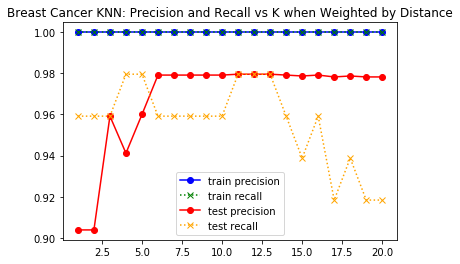

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Breast Cancer KNN: Precision and Recall vs K when Weighted by Distance')

#plt.ylim((0,1))
plt.plot(ks, list(train_precision), 'o-', color='blue', label='train precision')
plt.plot(ks, list(train_recall), 'x', color='green', label='train recall', linestyle=':')

plt.plot(ks, list(test_precision), 'o-', color='red', label='test precision')


plt.plot(ks, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('plots/precision_recall_knn_breastCancer')
plt.legend()
plt.show()
#ideal number of layers is 2 layer

In [4]:
#std as increase value of k
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np

df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]



#kNN
ks = range(1, 11)
avg_train_precision = []
avg_test_precision = []

std_train_precision = []
std_test_precision =[]

avg_train_recall = []
avg_test_recall = []

std_train_recall = []
std_test_recall = []
#params ={V:2}
for i, k in enumerate(ks):

    
    train_precision = []
    test_precision = []
    train_recall = []
    test_recall = []

    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf = KNeighborsClassifier(n_neighbors = 3,weights='distance', metric="euclidean")
        clf.fit(X_train, y_train)
    
        train_precision.append(precision_score(y_train, clf.predict(X_train)))
        test_precision.append(precision_score(y_test, clf.predict(X_test)))
    
        print(confusion_matrix(y_test, clf.predict(X_test)))
    
        train_recall.append(recall_score(y_train, clf.predict(X_train)))
        test_recall.append(recall_score(y_test, clf.predict(X_test)))
   
    

[[97  0]
 [ 3 43]]
[[91  2]
 [ 3 47]]
[[93  1]
 [ 3 46]]
[[89  1]
 [ 3 50]]
[[83  0]
 [ 4 56]]
[[90  0]
 [ 8 45]]
[[98  2]
 [ 4 39]]
[[87  0]
 [ 4 52]]
[[91  1]
 [ 4 47]]
[[91  0]
 [ 4 48]]
[[86  0]
 [ 3 54]]
[[91  0]
 [ 4 48]]
[[83  1]
 [ 9 50]]
[[88  1]
 [ 3 51]]
[[91  1]
 [ 5 46]]
[[88  1]
 [ 1 53]]
[[89  1]
 [ 6 47]]
[[84  1]
 [ 6 52]]
[[87  3]
 [ 6 47]]
[[87  0]
 [ 5 51]]
[[90  0]
 [ 5 48]]
[[85  0]
 [ 4 54]]
[[88  2]
 [ 4 49]]
[[86  1]
 [ 7 49]]
[[93  0]
 [ 5 45]]
[[89  1]
 [ 6 47]]
[[88  0]
 [ 2 53]]
[[84  0]
 [ 5 54]]
[[95  0]
 [ 2 46]]
[[87  2]
 [ 6 48]]
[[87  0]
 [ 3 53]]
[[86  0]
 [ 4 53]]
[[85  1]
 [ 6 51]]
[[89  0]
 [ 2 52]]
[[89  0]
 [ 3 51]]
[[81  0]
 [ 5 57]]
[[104   0]
 [  2  37]]
[[98  0]
 [ 0 45]]
[[84  1]
 [ 4 54]]
[[104   1]
 [  4  34]]
[[97  1]
 [ 4 41]]
[[85  0]
 [ 8 50]]
[[84  1]
 [ 4 54]]
[[87  1]
 [ 4 51]]
[[83  0]
 [ 3 57]]
[[91  0]
 [ 4 48]]
[[95  2]
 [ 5 41]]
[[89  1]
 [ 2 51]]
[[92  1]
 [ 0 50]]
[[88  1]
 [ 5 49]]
[[88  0]
 [ 6 49]]
[[97  1]
 [ 4 41]]
[[80

In [7]:
#training set size
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np

df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)


#kNN
portions = range(10, 101, 10)
train_precision = []
test_precision = []

std_train_precision = []
std_test_precision =[]

train_recall = []
test_recall = []

std_train_recall = []
std_test_recall = []
#params ={V:2}
for i, k in enumerate(portions):
    end = int(len(X_train)* k/100.0)
    print(end, k )
    
    scaler = StandardScaler()
    scaler.fit(X_train[:end])
    X_train_temp = scaler.transform(X_train[:end])
    X_test_temp = scaler.transform(X_test)
    clf = KNeighborsClassifier(n_neighbors = 3,weights='uniform', metric="euclidean")
    clf.fit(X_train_temp[:end], y_train[:end])

    train_precision.append(precision_score(y_train[:end], clf.predict(X_train_temp[:end])))
    test_precision.append(precision_score(y_test, clf.predict(X_test_temp)))

    print(confusion_matrix(y_test, clf.predict(X_test_temp)))
    
    train_recall.append(recall_score(y_train[:end], clf.predict(X_train_temp[:end])))
    test_recall.append(recall_score(y_test, clf.predict(X_test_temp)))
    
    

42 10
[[89  6]
 [ 4 44]]
85 20
[[87  8]
 [ 4 44]]
127 30
[[90  5]
 [ 4 44]]
170 40
[[91  4]
 [ 5 43]]
213 50
[[91  4]
 [ 4 44]]
255 60
[[92  3]
 [ 3 45]]
298 70
[[92  3]
 [ 3 45]]
340 80
[[92  3]
 [ 3 45]]
383 90
[[92  3]
 [ 3 45]]
426 100
[[93  2]
 [ 3 45]]


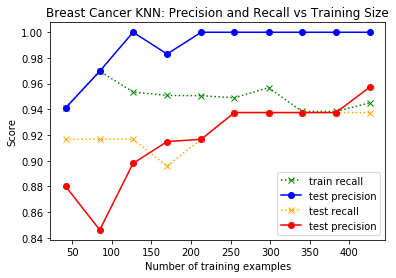

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Breast Cancer KNN: Precision and Recall vs Training Size')
#plt.ylim((0,1))
ps = [int(len(X_train)* p/100.0) for p in portions]
plt.plot(ps, list(train_recall), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ps, list(train_precision), 'o-', color='blue', label='test precision')

plt.plot(ps, list(test_recall),'x',color='orange',  label='test recall',linestyle=':')
plt.plot(ps, list(test_precision),'o-',  color='red',  label='test precision')


#plt.plot(ks, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

plt.xlabel("Number of training examples")
plt.ylabel("Score")
#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('training_size_bc_knn')
plt.legend()
plt.show()

In [3]:
test_recall

[0.7884615384615384,
 0.8269230769230769,
 0.8461538461538461,
 0.8461538461538461,
 0.8653846153846154,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846]

In [12]:
std_train_precision

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [3]:
test_recall

[0.9038461538461539,
 0.8846153846153846,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9038461538461539,
 0.9038461538461539,
 0.9038461538461539,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9038461538461539,
 0.9038461538461539,
 0.9038461538461539,
 0.9038461538461539,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846]

In [ ]:
uniform =test_recall

In [ ]:
uniform

In [ ]:
test_recall

In [ ]:
import operator

In [ ]:
list(map(operator.sub, uniform, test_recall))

In [ ]:
list()